# Links

1.   [Time Steps in Keras](https://stats.stackexchange.com/questions/377091/time-steps-in-keras-lstm)
2.   [Difference Between Return Sequences and Return States for LSTMs in Keras](https://machinelearningmastery.com/return-sequences-and-return-states-for-lstms-in-keras/)
3. [Stacked LSTM](https://machinelearningmastery.com/stacked-long-short-term-memory-networks/)
4.   [RNN-LSTM quick guide](https://towardsdatascience.com/understanding-lstm-and-its-quick-implementation-in-keras-for-sentiment-analysis-af410fd85b47)
5.   [Keras LSTM tutorial – How to easily build a powerful deep learning language model](https://adventuresinmachinelearning.com/keras-lstm-tutorial/)
6. [Understanding Input and Output shapes in LSTM | Keras](https://medium.com/@shivajbd/understanding-input-and-output-shape-in-lstm-keras-c501ee95c65e)
7. [Illustrated Guide to LSTM's and GRU's: A step by step explanation](https://www.youtube.com/watch?v=8HyCNIVRbSU)

To specify an LSTM layer, first you have to provide the number of nodes in the hidden layers within the LSTM cell, e.g. the number of cells in the forget gate layer, the tanh squashing input layer and so on. The next argument that is specified in the code above is the return_sequences=True argument. What this does is ensure that the LSTM cell returns all of the outputs from the unrolled LSTM cell through time. If this argument is left out, the LSTM cell will simply provide the output of the LSTM cell from the last time step

In [0]:
# !pip install -U tensorflow-gpu

In [0]:
import builtins

def print(*args, **kwargs):
    return builtins.print(*args, **kwargs, end="\n\n")

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
from tensorflow.keras import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [0]:
# !wget --no-check-certificate \
#     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
#     -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus[:10]:
	# print([line])
	token_list = tokenizer.texts_to_sequences([line])[0]
	# print(token_list)
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)
	# break
# print(input_sequences)

# # pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label

predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

# print(input_sequences[:5])
# print(predictors[:5])
# print(label[:5])

label = ku.to_categorical(label, num_classes=total_words)


In [0]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len - 1))
model.add(LSTM(150, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words//2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 8, 100)            321100    
_________________________________________________________________
lstm (LSTM)                  (None, 8, 150)            150600    
_________________________________________________________________
dropout (Dropout)            (None, 8, 150)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               100400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 5,891,071
Trainable params: 5,891,071
Non-trainable params: 0
______________________________________________

In [0]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Train on 64 samples
Epoch 1/100
64/64 [==============================] - 4s 64ms/sample - loss: 9.9100 - accuracy: 0.0156
Epoch 2/100
64/64 [==============================] - 0s 450us/sample - loss: 9.7184 - accuracy: 0.0469
Epoch 3/100
64/64 [==============================] - 0s 496us/sample - loss: 9.5305 - accuracy: 0.0469
Epoch 4/100
64/64 [==============================] - 0s 435us/sample - loss: 9.3347 - accuracy: 0.0469
Epoch 5/100
64/64 [==============================] - 0s 454us/sample - loss: 9.0984 - accuracy: 0.0469
Epoch 6/100
64/64 [==============================] - 0s 419us/sample - loss: 8.7370 - accuracy: 0.0469
Epoch 7/100
64/64 [==============================] - 0s 441us/sample - loss: 8.0174 - accuracy: 0.0469
Epoch 8/100
64/64 [==============================] - 0s 423us/sample - loss: 6.5358 - accuracy: 0.0469
Epoch 9/100
64/64 [==============================] - 0s 415us/sample - loss: 5.1515 - accuracy: 0.0469
Epoch 10/100
64/64 [==============================] - 

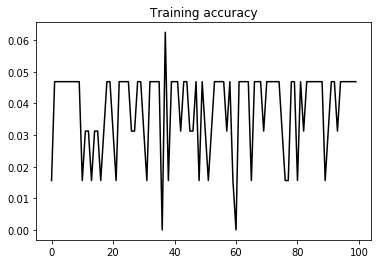

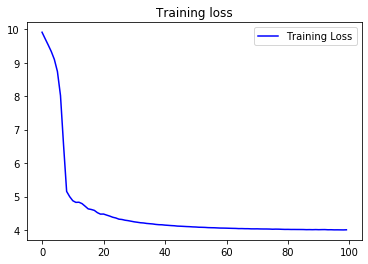

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'k-', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [0]:
seed_text = "Help me Obi Wan Kenobi, you're my only"
next_words = 30

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen = max_sequence_len - 1, padding = 'pre')
    predicted = model.predict_classes(token_list, verbose = 0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
        	output_word = word
        	break
    seed_text += " " + output_word

print(seed_text)

Help me Obi Wan Kenobi, you're my only the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the

